# 추정

## 1. 주사위 문제

> 베이지안 접근법
> 1. 가설을 나타내자
> 2. 데이터를 나타내자
> 3. 우도함수를 작성하자

>- 예제
>- 4면체, 6면체, 8면체, 12면체, 20면체 주사위가 든 상자가 있음
>- 상자에서 주사위 하나를 집어 던졌더니 6이 나옴
>- 각 주사위를 선택했을 확률은 어떻게 될까?


$1$. 가설 설정


- 선택한 주사위는 4면체, 6면체, 8면체, 12면체, 20면체 중 하나이다

In [1]:
from thinkbayes import Pmf
from thinkbayes import Suite

In [7]:
hypotheses = [4, 6, 8, 12, 20]

$2$. 데이터를 나타내자


- 데이터는 4면체부터 20면체까지의 주사위에서 나올수 있는 숫자들이고, range(1,21)로 모두 정의할 수 있음
- 이 경우 4면체에서는 5부터 20까지의 데이터는 무시됨

$3$. 우도함수를 작성하자

- 주사위를 굴려 특정 값이 나올 확률은 "1/주사위크기"로 나타낼 수 있음
- 위 가설에서는 "1/가설명"으로 나타낼 수 있음
- 단, 주사위 크기보다 큰 값이 나올 확률은 0임

In [14]:
def likelihood(self, data, hypo):
    if data > hypo:
        return 0
    else:
        return 1/hypo

- 위 과정을 class로 구현하자면 아래와 같음

In [19]:
class Dice(Suite):
    
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0
        else:
            return 1/hypo

In [20]:
suite = Dice(hypotheses)
suite.d

{4: 0.2, 6: 0.2, 8: 0.2, 12: 0.2, 20: 0.2}

In [21]:
suite.Update(6)
suite.d

{4: 0.0,
 6: 0.3921568627450981,
 8: 0.29411764705882354,
 12: 0.19607843137254904,
 20: 0.11764705882352944}

- 4면체를 골랐을 확률은 0% (6이 나올 수 없으므로), 6면체를 골랐을 확률은 39%, 8면체를 골랐을 확률은 29%, 12면체를 골랐을 확률은 20%, 20면체를 골랐을 확률은 12%임

- 만약 몇번 더 굴려서 11, 9, 4, 3이 나왔다면 아래와 같이 확률을 계산 가능

In [23]:
for i in [11, 9, 4, 3]:
    suite.Update(i)

suite.d

{4: 0.0, 6: 0.0, 8: 0.0, 12: 0.9278503562945368, 20: 0.07214964370546323}

___
## 2. 기관차 문제



$"Fifty\ Challenging\ Problems\ in\ Probability\ with\ Solutions"$
- 각 철도는 1부터 $N$까지의 순서로 번호를 붙임
- 어느 날 60호 기관차를 발견
- 이 철도에는 몇개의 기관차가 지나갈 지 추측

베이지안 추론법에 따르면 아래 2단계로 문제를 해결
>1. $N$에 대해 알고 있는 것이 무엇인가?  - __사전확률__
>2. $N$에 어떤 값이 주어질 때 관측값의 우도는 어떻게 되는가? -__우도__

- 현 상황에서 사전확률에 대한 근거는 부족
- 따라서 __간단한 가정으로 시작하여 보완해가는 방법__을 차용

- $N$은 1부터 1000까지 어떤 값이든지 될 수 있음

In [3]:
hypos = range(1,1001)

- 우도함수는 주사위 문제와 동일

In [4]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

In [5]:
suite = Train(hypos)
suite.Update(60)

0.0028222671142652746

- 주사위 문제와 동일한 방식으로 갱신 시 결과 값은 60에서 가장 가능성이 높게 나옴 *(당연)*

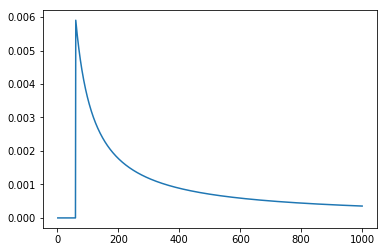

In [26]:
pd.Series(suite.d, index = suite.d.keys()).plot()

- 사후평균(MMSE)은 333이며, 이를 최소화 하는 방향으로 조절해 나아갈 필요가 있음

In [30]:
suite.Mean()

333.41989326371095

___
## 3. 사전 확률로 할 수 있는 것

- 합리적인 경우라면 1000보다 많거나 적게 추측할 수도 있음
- MMSE를 최소화하는 추측이라면 60이 답이 될 수도 있음
- 하지만 이런 추론은 좋지 않으며, 2가지 방식으로 합리적인 추론을 할 수 있음
> ### 1. 데이터를 더 확보할 것
> ### 2. 배경 지식을 더 확보할 것

예를 들어 60호 외 30호와 90호 기관차도 보았다면, 분포를 아래와 같이 갱신 가능

In [35]:
suite = Train(range(1,1001))
for data in [60, 30, 90]:
    suite.Update(data)

suite.Mean()

164.3055864227336

In [51]:
MMSE = pd.DataFrame({'기관차 수': [500, 1000, 2000], '60호만 볼 경우': [0, 0, 0], '추가 관측': [0, 0, 0]}).iloc[:,[1,0,2]]

n = 0
for i in [range(1,501),range(1,1001), range(1,2001)]:
    suite = Train(i)
    suite.Update(60)
    MMSE.iloc[n,1] = round(suite.Mean(),0)
    for data in [30, 90]:
        suite.Update(data)
    MMSE.iloc[n,2] = round(suite.Mean(),0)
    n += 1

MMSE

,기관차 수,60호만 볼 경우,추가 관측
0,500,207.0,152.0
1,1000,333.0,164.0
2,2000,552.0,171.0


- 데이터가 더 확보된다면, 사후확률의 MSE는 차이가 더 작아짐

___
## 4. 사전확률의 대안
- 데이터를 더 확보할 수 없다면, 배경지식을 바탕으로 사전확률을 개선하는 방식이 있음
- 예를 들어, 1000대의 기관차를 운영하는 회사가 세상에 하나뿐이라고 가정하는 것은 비합리적일 수 있음
- 관측 데이터에서 철도 회사 목록을 찾을 수도 있고, 전문가와 인터뷰 할 수도 있음
- 철도 경제에 특화된 정보 수집 없이도 학습된 추측을 할 수 있으며, 본 케이스에서는 **"로버트 액스텔의 멱법칙"**을 따른다는 가정하에 추정을 수행

- 멱법칙의 그래프와 함수는 아래와 같음

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

$$
f(x) = kx^\alpha,
$$
>where:  
>$x =$ variable  
>$\alpha =$ law's exponent  
>$k =$ constant